<a href="https://colab.research.google.com/github/LeonardoClemente23/ENEM-2018/blob/main/analise_enem_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados: Relação entre notas do ENEM 2018 e acesso a tecnologia e a área de estudo.


   O objetivo deste trabalho é verificar qual relação entre as notas dos alunos que fizeram a prova do ENEM e o seus acessos à computadores, internet e quartos para dormir.
    
   A motivação foi a polêmica gerada pela propaganda divulgada pelo governo federal, que informa que o ENEM não terá alteração na data da prova e sugere maneiras de estudar, levando em consideração o cenário atual de pandemia e do regime de isolamento social que o país está passando.
    
Umas das coisas que a propaganda sugere é que as pessoas que fazem o ENEM tenham: 

   1.   Um quarto ou uma área na casa, separada para estudar;
   2.   Acesso à celulares e computadores (de ultima geração);
   3.   Acesso à internet.

A partir do conjunto de dados disponibilizados pelo INEP no site http://portal.inep.gov.br/microdados iremos verificar se:


   1.   Essa é a realidade da maioria dos inscritos do ENEM;
   2.   A falta de acesso às tecnologias pode acarretar em uma diferença nas notas;
   3.   A renda familiar tem correlação com o desempenho do inscrito;
   
Para isso usaremos as seguintes perguntas respondidas no questionário socioeconômico:
 
 
   1.   Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.);
   2.   Q009: Na sua residência tem quartos para dormir?;
   3.   Q024: Na sua residência tem computador?;
   4.   Q025: Na sua residência tem acesso à Internet?



In [ ]:
#importando módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# colunas do data frame utilizadas
colunas = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
           'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q006', 'Q009', 'Q024',
           'Q025']

In [ ]:
# abrindo arquivo csv
exemplo = pd.read_csv('C:/Users/Leonardo/Documents/Datasets/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv',
                      sep=';', encoding='ISO-8859-1', usecols=colunas)

In [ ]:
# removendo valores NaN do data frame
exemplo = exemplo.dropna()

In [ ]:
# Renomeando as colunas com as respostas
exemplo.rename(columns={'Q006':'RENDA_FAMILIAR','Q009':'TEM_QUARTO','Q024':'TEM_COMPUTADOR','Q025':'TEM_INTERNET'},
               inplace=True)

In [ ]:
q006_respostas = {'A':'Nenhuma renda.',
                  'B':'Até 954,00.',
                  'C':'De 954,01 até 1.431,00.',
                  'D':'De 1.431,01 até 1.908,00.',
                  'E':'De 1.908,01 até 2.385,00.',
                  'F':'De 2.385,01 até 2.862,00.',
                  'G':'De 2.862,01 até 3.816,00.',
                  'H':'De 3.816,01 até 4.770,00.',
                  'I':'De 4.770,01 até 5.724,00.',
                  'J':'De 5.724,01 até 6.678,00.',
                  'K':'De 6.678,01 até 7.632,00.',
                  'L':'De 7.632,01 até 8.586,00.',
                  'M':'De 8.586,01 até 9.540,00.',
                  'N':'De 9.540,01 até 11.448,00.',
                  'O':'De 11.448,01 até 14.310,00.',
                  'P':'De 14.310,01 até 19.080,00.',
                  'Q':'Mais de 19.080,00.'}

q009_respostas = {'A':'Zero',
                  'B':'Um',
                  'C':'Dois',
                  'D':'Três',
                  'E':'Quatro ou mais'}

q024_respostas = {'A':'Zero',
                  'B':'Um',
                  'C':'Dois',
                  'D':'Três',
                  'E':'Quatro ou mais'}

q025_respostas = {'A':'Não',
                  'B':'Sim'}

In [ ]:
# trocar a letra de identificação da resposta, pela resposta por escrito
exemplo['TEM_QUARTO'] = [q009_respostas[resp] for resp in exemplo['TEM_QUARTO']]
exemplo['TEM_COMPUTADOR'] = [q024_respostas[resp] for resp in exemplo['TEM_COMPUTADOR']]
exemplo['TEM_INTERNET'] = [q025_respostas[resp] for resp in exemplo['TEM_INTERNET']]

### 1. Essa é a realidade da da maioria do inscritos do ENEM?


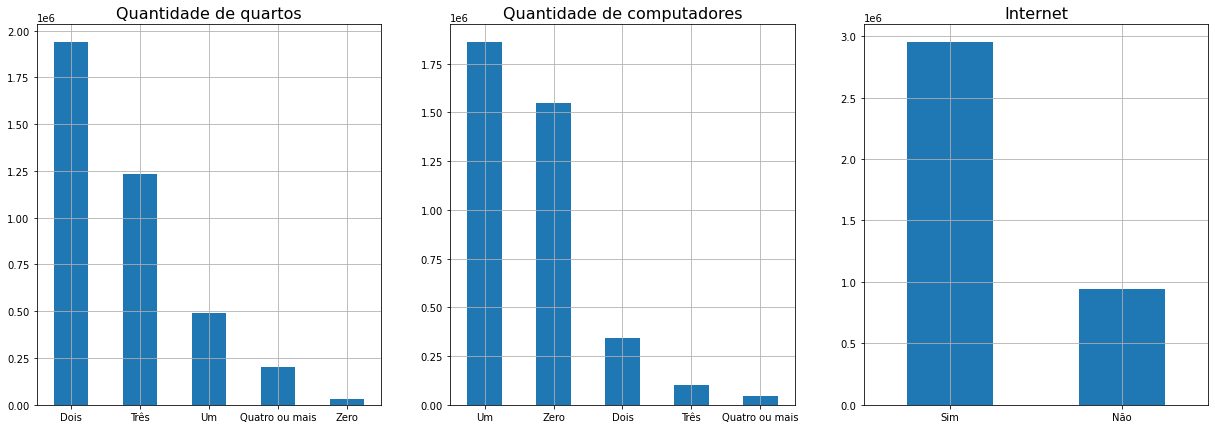

In [ ]:
# Gráficos da quantidade de inscritos por resposta
fig, axes1 = plt.subplots(nrows=1,ncols=3, figsize=(21,7))


exemplo['TEM_QUARTO'].value_counts().plot(kind='bar',ax=axes1[0], grid=True)
axes1[0].set_title('Quantidade de quartos', size=16)
axes1[0].tick_params(axis='x',labelrotation=0)

exemplo['TEM_COMPUTADOR'].value_counts().plot(kind='bar',ax=axes1[1], grid=True)
axes1[1].set_title('Quantidade de computadores', size=16)
axes1[1].tick_params(axis='x',labelrotation=0)

exemplo['TEM_INTERNET'].value_counts().plot(kind='bar',ax=axes1[2], grid=True)
axes1[2].set_title('Internet', size=16)
axes1[2].tick_params(axis='x',labelrotation=0)

plt.show()

   De fato, a propaganda mostra o que a maioria dos inscritos têm, como visto nos gráficos acima. A maioria tem ao menos um quarto, um computador e acesso à internet, embora a quantidade de pessoas que não tem computador seja significativamente grande. O mesmo vale para que não tem acesso.

### 2. A falta de acesso às tecnologias pode acarretar em uma diferença nas notas?


In [ ]:
# Relação entre nota de redação e qtde. de quartos
desc_quarto = exemplo[['NU_NOTA_REDACAO', 'TEM_QUARTO']].groupby('TEM_QUARTO').describe()\
.sort_values(('NU_NOTA_REDACAO',  'mean'), ascending=False)

desc_quarto

NU_NOTA_REDACAO                                             \
                         count        mean         std  min    25%    50%   
TEM_QUARTO                                                                  
Quatro ou mais        202449.0  588.239211  198.110219  0.0  440.0  600.0   
Três                 1233979.0  548.230254  188.723084  0.0  400.0  560.0   
Dois                 1937194.0  501.306797  177.823165  0.0  360.0  520.0   
Um                    490050.0  467.237466  170.493804  0.0  340.0  480.0   
Zero                   30071.0  455.857803  175.872347  0.0  340.0  460.0   

                               
                  75%     max  
TEM_QUARTO                     
Quatro ou mais  720.0  1000.0  
Três            680.0  1000.0  
Dois            620.0  1000.0  
Um              580.0   980.0  
Zero            580.0   980.0

In [ ]:
# Relação entre nota de redação e qtde. de computadores
desc_comp = exemplo[['NU_NOTA_REDACAO', 'TEM_COMPUTADOR']].groupby('TEM_COMPUTADOR').describe()\
.sort_values(('NU_NOTA_REDACAO',  'mean'), ascending=False)

desc_comp

NU_NOTA_REDACAO                                             \
                         count        mean         std  min    25%    50%   
TEM_COMPUTADOR                                                              
Quatro ou mais         43451.0  673.160572  174.203184  0.0  560.0  680.0   
Três                  102319.0  653.475308  178.805809  0.0  560.0  660.0   
Dois                  340194.0  614.186729  182.878724  0.0  500.0  620.0   
Um                   1858939.0  535.239134  180.145257  0.0  380.0  540.0   
Zero                 1548840.0  457.999161  168.313172  0.0  340.0  460.0   

                               
                  75%     max  
TEM_COMPUTADOR                 
Quatro ou mais  800.0  1000.0  
Três            780.0  1000.0  
Dois            740.0  1000.0  
Um              640.0  1000.0  
Zero            580.0  1000.0

In [ ]:
# Relação entre nota de redação e acesso à internet
desc_internet = exemplo[['NU_NOTA_REDACAO', 'TEM_INTERNET']].groupby('TEM_INTERNET').describe()\
.sort_values(('NU_NOTA_REDACAO',  'mean'), ascending=False)

desc_internet

NU_NOTA_REDACAO                                             \
                       count        mean         std  min    25%    50%   
TEM_INTERNET                                                              
Sim                2949460.0  537.563086  184.681695  0.0  380.0  540.0   
Não                 944283.0  448.889348  166.363092  0.0  340.0  440.0   

                             
                75%     max  
TEM_INTERNET                 
Sim           660.0  1000.0  
Não           560.0   980.0

In [ ]:
# Relação entre a média das notas e qtde de quartos
notas_quarto = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TEM_QUARTO']
plot1 = exemplo[notas_quarto].groupby('TEM_QUARTO').mean().sort_values('NU_NOTA_REDACAO', ascending=False)

plot1

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TEM_QUARTO,,,,,
Quatro ou mais,527.605209,599.920472,557.920547,587.380836,588.239211
Três,508.020761,583.270372,541.346380,556.735517,548.230254
Dois,486.191286,564.308545,522.238217,524.398459,501.306797
Um,475.199321,554.481906,510.388288,506.578706,467.237466
Zero,470.594410,548.647574,503.949516,500.040258,455.857803


In [ ]:
# Relação entre a média das notas e qtde de computadores
notas_comp = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TEM_COMPUTADOR']
plot2 = exemplo[notas_comp].groupby('TEM_COMPUTADOR').mean().sort_values('NU_NOTA_REDACAO', ascending=False)

plot2

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TEM_COMPUTADOR,,,,,
Quatro ou mais,576.015097,642.840650,600.673876,660.942715,673.160572
Três,562.552338,632.814969,591.206978,636.556116,653.475308
Dois,540.618944,616.085737,574.342211,603.195190,614.186729
Um,501.041821,580.360902,538.268150,545.126922,535.239134
Zero,467.872656,543.289692,500.581268,498.857382,457.999161


In [ ]:
# Relação entre a média das notas e acesso à internet
notas_net = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TEM_INTERNET']
plot3 = exemplo[notas_net].groupby('TEM_INTERNET').mean().sort_values('NU_NOTA_REDACAO', ascending=False)

plot3

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TEM_INTERNET,,,,,
Sim,502.862899,580.643558,538.955883,548.709511,537.563086
Não,465.321947,540.101968,495.909055,494.200361,448.889348


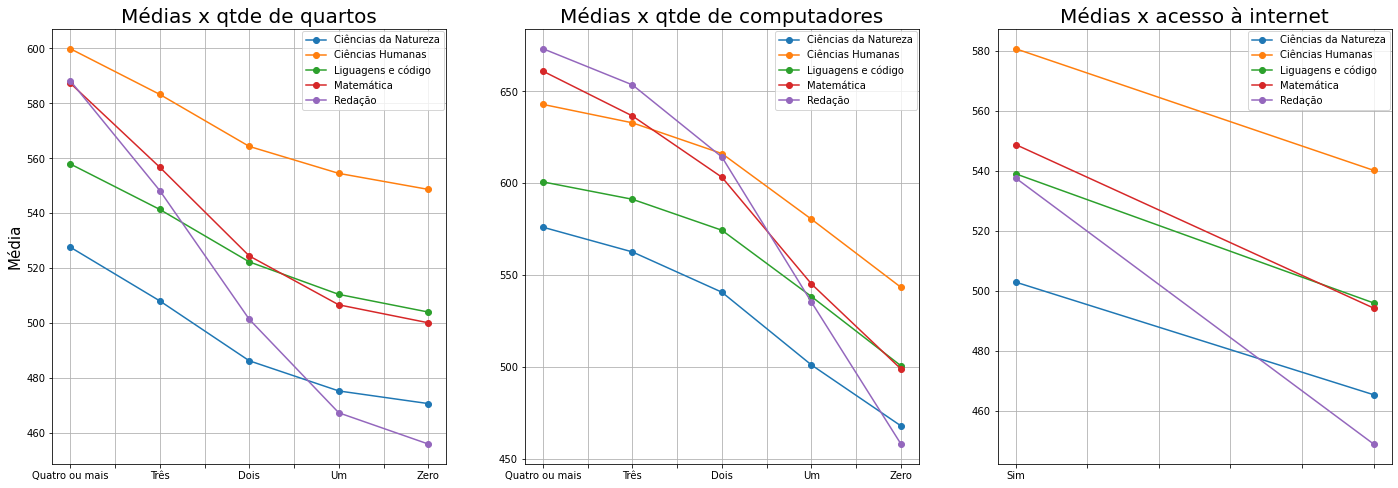

In [ ]:
# Gráfico das médias das provas por resposta 
fig2, axes2 = plt.subplots(nrows=1,ncols=3, figsize=(24,8))

plot1.plot(marker='o', grid=True, ax=axes2[0])
axes2[0].set_title("Médias x qtde de quartos", size=20)
axes2[0].set_xlabel("")
axes2[0].set_ylabel("Média", size=15)

plot2.plot(marker='o', grid=True, ax=axes2[1])
axes2[1].set_title("Médias x qtde de computadores", size=20)
axes2[1].set_xlabel("")

plot3.plot(marker='o', grid=True, ax=axes2[2])
axes2[2].set_title("Médias x acesso à internet", size=20)
axes2[2].set_xlabel("")

labels = ['Ciências da Natureza', 'Ciências Humanas', 'Liguagens e código',
          'Matemática', 'Redação']
axes2[0].legend(labels, bbox_to_anchor=(0.995, 0.995), loc=0, borderaxespad=0.)
axes2[1].legend(labels, bbox_to_anchor=(0.995, 0.995), loc=0, borderaxespad=0.)
axes2[2].legend(labels, bbox_to_anchor=(0.995, 0.995), loc=0, borderaxespad=0.)

plt.show()

   Como apresentado nos gráficos acima, aparentemente sim. O acesso à tecnologia e a quantidade quartos tem relação com a nota obtida. 
Acredito que existem dois principais motivos para esse comportamento nos gráficos.

   1. Renda familiar
   2. Acesso à informação
   
Renda familiar está diretamente ligada a esse comportamento porque casas com muitos quartos tendem a ter custos mais altos(IPTU, luz, manutenção, etc), também é custoso ter um computador em casa(que dirá mais do que um) e Internet também é uma despesa mensal extra.

O acesso à informação támbem é um fator porque ter mais a materiais de estudo como, videoaulas, listas de exercícios, pesquisas, notícias entre outros, sugere que o inscrito se capacite melhor para a prova do que quem tem acesso defasado ou nenhum acesso.

### 3.   Renda familiar x desempenho

Veremos neste tópico a relação entre a renda familiar e o desempenho dos inscritos.

In [ ]:
exemplo['RENDA_FAMILIAR'] = [q006_respostas[resp] for resp in exemplo['RENDA_FAMILIAR']]

In [ ]:
exemplo[['NU_INSCRICAO','RENDA_FAMILIAR']].groupby('RENDA_FAMILIAR').count()\
.sort_values('NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
RENDA_FAMILIAR,
"De 954,01 até 1.431,00.",979903
"Até 954,00.",891153
"De 1.431,01 até 1.908,00.",364313
"De 1.908,01 até 2.385,00.",360081
"De 2.862,01 até 3.816,00.",276106
"De 2.385,01 até 2.862,00.",175316
"De 3.816,01 até 4.770,00.",167665
Nenhuma renda.,153283
"De 4.770,01 até 5.724,00.",138437


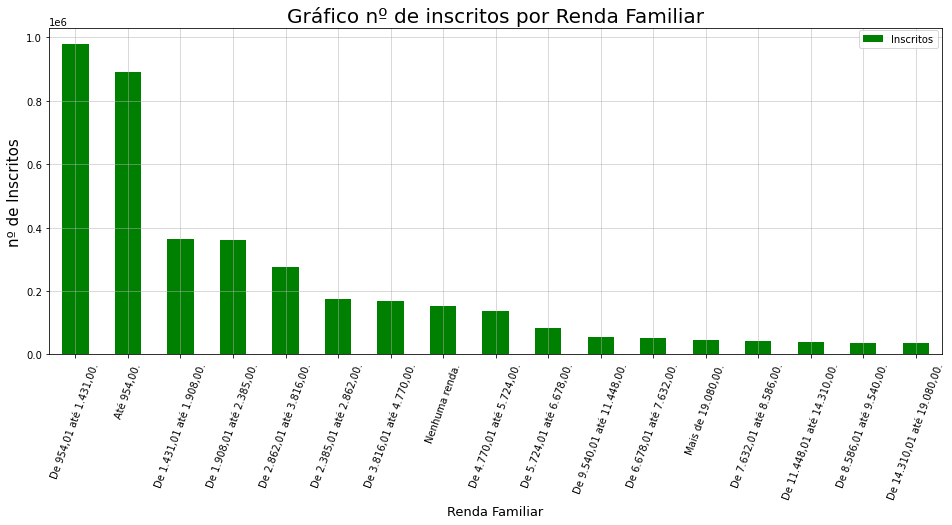

In [ ]:
# Gráfico qtde. de inscritos por renda familiar
plot5 = exemplo[['NU_INSCRICAO','RENDA_FAMILIAR']].groupby('RENDA_FAMILIAR').count()\
.sort_values('NU_INSCRICAO',ascending=False).plot(kind='bar', figsize=(16,6), grid=True, color='green')

plot5.set_title('Gráfico nº de inscritos por Renda Familiar',size=20)
plot5.set_xlabel('Renda Familiar',size=13)
plot5.set_ylabel("nº de Inscritos", size=15)

plot5.legend(['Inscritos'], bbox_to_anchor=(0.995, 0.995), loc=0, borderaxespad=0.)

plot5.tick_params(axis='x',labelrotation=70)
plot5.tick_params(grid_alpha=0.6)

plt.show()

In [ ]:
# Médias das notas por renda familiar
notas_renda = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO','RENDA_FAMILIAR']

plot6 = exemplo[notas_renda].groupby('RENDA_FAMILIAR').mean().sort_values('NU_NOTA_REDACAO', ascending=False)

plot6

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
RENDA_FAMILIAR,,,,,
"Mais de 19.080,00.",589.134140,652.520880,609.197792,682.641918,707.746535
"De 14.310,01 até 19.080,00.",582.376342,646.328440,603.593983,666.203793,693.280954
"De 11.448,01 até 14.310,00.",576.181126,641.914324,599.142541,654.993351,683.645032
"De 9.540,01 até 11.448,00.",569.487669,636.480788,593.738656,644.621461,669.755345
"De 8.586,01 até 9.540,00.",562.671542,631.052137,588.625473,633.462378,658.790740
"De 7.632,01 até 8.586,00.",559.491167,629.015501,586.404156,629.345758,653.555260
"De 6.678,01 até 7.632,00.",552.133388,623.237674,581.230027,618.068826,638.692892
"De 5.724,01 até 6.678,00.",546.280560,618.900596,577.442906,609.881079,628.313695
"De 4.770,01 até 5.724,00.",536.346309,611.558454,569.935772,596.736997,608.260508


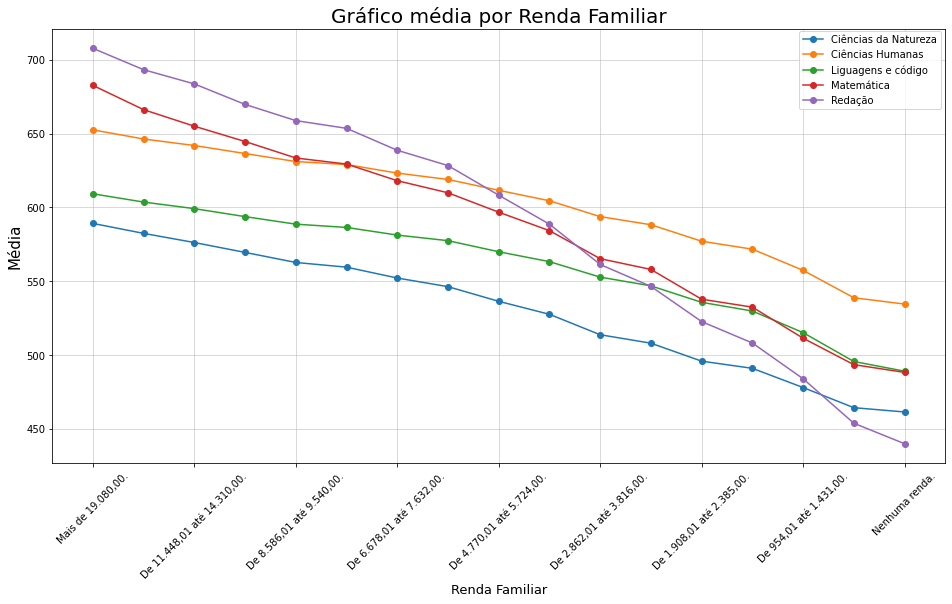

In [ ]:
# gráfico das médias das notas por renda familiar
grafico_nota_renda = plot6.plot(marker='o',figsize=(16,8),grid=True)

grafico_nota_renda.set_title('Gráfico média por Renda Familiar',size=20)
grafico_nota_renda.set_xlabel('Renda Familiar',size=13)
grafico_nota_renda.set_ylabel("Média", size=15)

grafico_nota_renda.legend(labels, bbox_to_anchor=(0.995, 0.995), loc=0, borderaxespad=0.)

grafico_nota_renda.tick_params(axis='x',labelrotation=45)
grafico_nota_renda.tick_params(grid_alpha=0.6)

plt.show()

Como gráfico acima mostra, a nota tem correlação direta com a renda familiar do inscrito. As médias de Redação sofre mais impacto com essa variação do que as outras médias.Em média, as pessoas com mais de 19 080,00 reias de renda familiar apresentam como maior nota a redação, enquanto pra quem tem até 954,00 reias é a menor.  Matemática é a segunda que mais apresenta variação. Ciências Humanas, da Natureza e Linguagens e código aparentemente têm o mesmo quoeficiente angular(mesmo comportamento de queda). 

O plot também apresenta que a relação notas e quantidade quartos ou compuatdores ou acesso à internet está ligada a condição financeira do aluno. Se as maiores notas estão com os que tem mais quartos, mais computadores, acesso à internet e maiores rendas familiares, provavelmente estamos falando das mesmas pessoas.


### Resalvas
1. A renda familiar é a soma da renda de todos os membros da família. Com essa abordagem fica difícil saber renda per capita, por consequência do aluno. Pode-se haver alguém com uma renda familiar considerada baixa mas ele morar sozinho ou renda relativamente alta e morar com muitas pessoas.


2. Não fica claro se a internet em questão é a banda larga ou a móvel(3g ou 4g). Eu considerei apenas banda larga porque na minha interpretação a pergunta Q025 referia-se a esse tipo de conexão.


3. Foi possível fazer uma avaliação quanto ao fato de haver aula ou não afetaria na nota pois não existe uma pergunta diretamente relacionada a isso. A que mais se aproxima é a Q026 que evolve a situação dele em relação ao Ensino Médio

### Conclusão
Em 2018, sem existência de pandemia ou qualquer outra catástrofe relevante que afetasse a realização da prova, os acessos a ferramentas de estudo e, principalmente, a situação econômica do inscrito, afeta diretamente seu desempenho. Embora não seja possível obter qualquer pontuação, existem fatores que facilitam e dificultam o caminho. 

Trazendo agora para o conjuntura atual. Crise econômica global, escolas fechadas, defasagem no acesso e organização das matérias a serem estudadas, somado com as condições apontadas nesse estudo, a tendência é as notas diminuírem. E quanto menor a renda, maior será o impacto.

Uma prova de âmbito nacional, padronizado, com pouquíssimas restrições, ou seja, democrática e que serve como um medidor educacional relevante para o país, deve ser usada como ferramenta de correção de desnível educacional. Deve-se usar resultados anteriores para descobrir possíveis imperfeições e o que tiver ao alcance, corrigí-las para que se minimize o grau de influência que as desvantagens, que não diz respeito ao aluno, tenha sobre seu desempenho. O ENEM existe para corrigir injustiças.

Não sei se cabe discutir um cancelamento ainda, mas pelo andar da carroagem, é provável que seja necessário tratar sobre. Adiar é mais que necessário.

Conclusão do trabalho: 22/05/2020, às 19:36